# TP Python : TRAITEMENT DE L'IMAGE
*********************
## Olivier THÖNI

### FACULTÉ d'ÉDUCATION UCO
*********************
*document sous licence Creative Commons - CC : By/NC/SA*


NB : La spécification des fonctions (*"DocStrings"*) est en exercices...

## 1. Branchement des bibliothèques, chargement de l'image, affichage et enregistrement

->> bibliothèques

In [0]:
# bibliothèques utilisées

from PIL import Image # PIL est la bibliothèque spécialisée dans le traitement de l'image
import requests # Cette bibliothèque permet de visiter une adresse internet
from io import BytesIO # module pour transformer en bytes

import numpy as np # Bouh, c'est pas bien !
import matplotlib.pyplot as plt

from math import sqrt


->> chargement de l'image depuis le web ou depuis son ordinateur

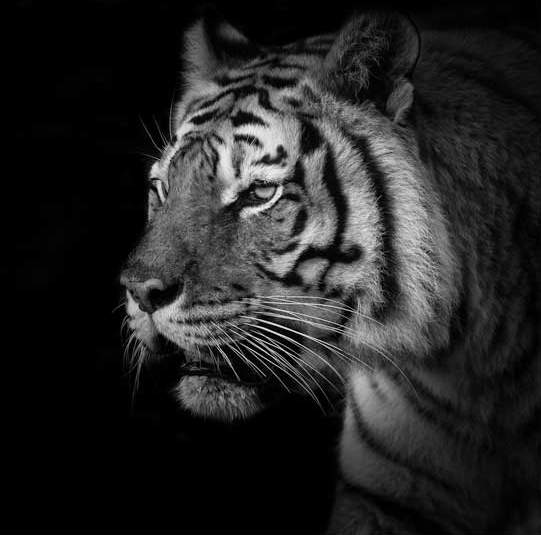

In [7]:
# téléchargement de l'image depuis une adresse internet et création de la variable de travail img
#response = requests.get("https://1f0c7243sbms4c9a3d39xz61-wpengine.netdna-ssl.com/wp-content/uploads/2018/06/photo-lion_noir-et-blanc_laurent-breillat-610x610.jpg")
#response = requests.get("https://zestedesavoir.com/media/galleries/3620/a72a36e3-9be3-4851-9629-6c3dc6b5b4b4.png")
#response = requests.get("https://cache.marieclaire.fr/data/photo/w700_c17/4i/george-clooney-what-else.jpg")
#response = requests.get("https://farm4.staticflickr.com/3671/9784770924_57c2244798.jpg")
#response = requests.get("https://media.centrakor.com/catalog/product/cache/image/0ee134d6d987b4a4dd752d2524c88dff/t/a/tableau-photo-noir-et-blanc-bateau-25x25cm-326627_326627_FRN01_WEB.jpg")
#response = requests.get("https://lh3.googleusercontent.com/proxy/7rdizwrcRKB6dSKmTKfqKsb3QsKA71P_EQCzrRpkesYRbRYZok5oNLGV2o_cnzd4QYODM2hQWACmIhQqnm9hd0rxBlQ81p3stjTkFKxhAZZQo_tmRAqPymeowVdU9FhvrHwKn_aV")
#response = requests.get("https://www.pixopolitan.com/blog/wp-content/uploads/2017/07/x34217_large.jpg.pagespeed.ic.okyZQFRxb_.webp")
response = requests.get("https://www.art-trope.fr/media/cache/artwork_view/media/image/atrayoux%20-%20profil%20de%20tigre%20-%20photo%20-%202017%20-%20151217%20043649.jpg")
#response = requests.get("https://www.laboiteverte.fr/wp-content/uploads/2013/05/noir-blanc-sous-eau-02.jpg")
#response = requests.get("https://www.laboiteverte.fr/wp-content/uploads/2013/05/noir-blanc-sous-eau-03.jpg")
#response = requests.get("https://www.laboiteverte.fr/wp-content/uploads/2013/05/noir-blanc-sous-eau-04.jpg")
imgpil = Image.open(BytesIO(response.content))

# L'image peut aussi être ouverte depuis l'ordinateur : 
#imgpil = Image.open("MonImage.png") # donner le chemin complet si pas dans le même répertoire


imgpil

In [16]:
# affichage de la valeur du pixel en haut à gauche, sur 3 couleurs RGB
coin=imgpil.getpixel((0,0))
print("coin haut-gauche, triplet RGB : ", coin)
print(coin[0])

# affichage des dimensions de l'image
largeur, hauteur = imgpil.size
largeur, hauteur = min(largeur, hauteur),min(largeur, hauteur) # pour s'assurer d'avoir une image carrée
print("largeur : ", largeur)
print("hauteur : ", hauteur)

coin haut-gauche, triplet RGB :  (0, 0, 0)
0
largeur :  535
hauteur :  535




->> Conversions

In [0]:
def convertfrompil(impil) :
    # fabrique un tableau de type "Portable GrayMap" (pgm), 1 seule ligne
    # et un tableau à la dimension de l'image composé des pixels en niveau de gris
    # à partir de l'image au format PIL

    pg = np.zeros([1,largeur * hauteur])
    imgray = np.zeros([largeur, hauteur])
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = impil.getpixel((j,i))
            imgray[i,j] = pixel[0] 
            pg[0,i*largeur+j] = pixel[0]
    return imgray, pg


In [0]:
img = np.asarray(imgpil) # transforme l'image PIl en array
imgpgm = imgpil.convert('L')

# imgpil contient l'image au format PIL : un tableau de triplets donnant les valeurs RVB de chaque pixel
# ...même si l'image est en niveaux de gris, auquel cas les 3 valeurs sont égales

# img est contient l'image convertie en array de Numpy


imggray, pgm = convertfrompil(imgpil)

# imggray contient l'image en niveau de gris, au format array(hauteur x largeur) de Numpy
# pgm contient l'image au format pgm, c'est-à-dire un array(1, hauteur x largeur)

->> Affichage de l'image

In [0]:
# affichage de l'image 
def affichage(im) :
    # affiche côte-à-côte l'image originale et l'image transformée
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray') # permet de visualiser l'image en console
    plt.show()



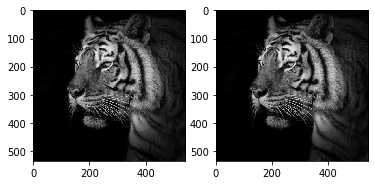

In [20]:
affichage(img)

->> Enregistrement de l'image avec PIL ou avec matplotlib

In [0]:
# enregistrement de l'image 
## avec PIL
def sauve_image(im) :
    imgpil = Image.fromarray(im) # reconvertit le tableau numpy en image PIL
    imgpil.save("resultat.png") # PIL permet d'enregistrer dans tous les formats classiques d'image
    
                
    ## enregistrement de l'image depuis matplotlib.image
    #import matplotlib.image as mpimg
    #mpimg.imsave("resultat.png", img)



In [0]:
sauve_image(img)

## 2. Affichage de l'histogramme de l'image


majorité à gauche = image sombre ("bouchée")... majorité à droite = image claire ("brûlée")

In [0]:
def histogramme(im) :
    h = np.zeros(256)
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = int(im[i,j])
            h[pixel] = h[pixel] + 1
    h[0] = 0 # si trop de noir
    h[255] = 0
    plt.plot(h)
    

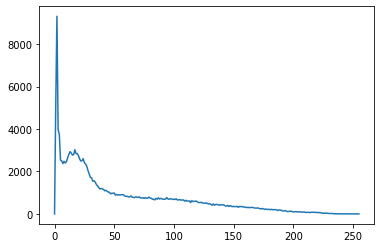

In [36]:

histogramme(imggray)

## 3. Premiers traitements : matriciels

### 3.1. Négatif

Il suffir de remplacer chaque pixel par son complément à 255...

In [0]:
def negalgo(im) : # version algorithmique
    imn = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            imn[i,j] = 255 - im[i,j]
    return imn

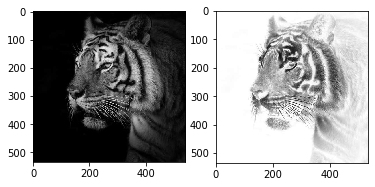

In [38]:
img2 = negalgo(imggray)
affichage(img2)

In [0]:
def neg(im) : # procédé vectoriel, un peu triché en première où l'on doit éviter les fonctionnalités propres à Numpy...
    imneg = 255 - im # l'opération se fait sur chaque élément de la matrice
    return imneg


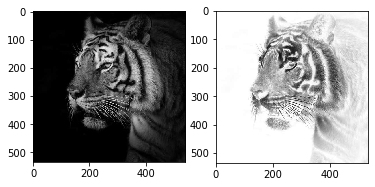

In [40]:
img2bis = neg(imggray)
affichage(img2bis)

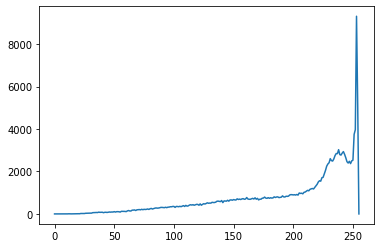

In [41]:
histogramme(img2)

### 3.2. Bordure

Remplacer les pixels périphériques par une bordure blanche et noire.

In [0]:
def bordure(im) :
    imb = np.copy(im) 
    # ne pas utiliser = pour copier un tableau, on ne fait que mettre deux étiquettes sur un même tableau
    for j in range(largeur) :
        imb[0,j] = 0
        imb[hauteur - 1,j] = 0
        imb[1,j] = 255
        imb[hauteur - 2,j] = 255
    for i in range(hauteur) :        
        imb[i,0] = 0
        imb[i,largeur-1] = 0
        imb[i,1] = 255
        imb[i,largeur - 2] = 255
    return imb

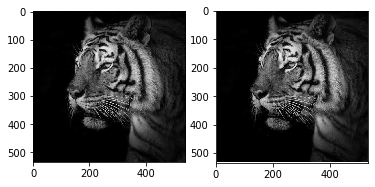

In [43]:
img3 = bordure(imggray)
affichage(img3)

In [0]:
#histogramme(img3)

### 3.3 Transformations géométriques simples
#### 3.3.1 Transposition
Transposer une matrice consiste simplement à échanger ses lignes et ses colonnes

In [0]:
def transpose(im) :
    imt = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            imt[i,j] = im[j,i]
    return imt

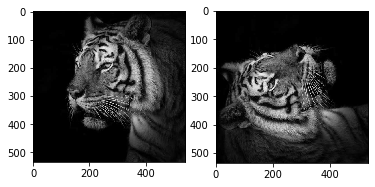

In [46]:
img4 = transpose(imggray)
affichage(img4)

#### 3.3.2. Symétrie Verticale

Effet miroir avec un miroir horizontal

In [0]:
def symV(im) :
    imSV = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            imSV[i,j] = im[hauteur - i - 1,j]
    return imSV

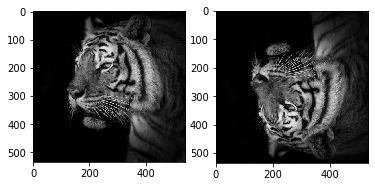

In [48]:
img5 = symV(imggray)
affichage(img5)

#### 3.3.3. Symétrie horizontale

(par rapport à un axe vertical)


In [0]:
def symH(im) :
    imSH = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            imSH[i,j] = im[i ,largeur - j - 1]
    return imSH

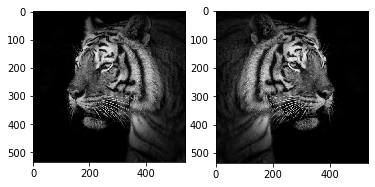

In [50]:
img6 = symH(imggray)
affichage(img6)

#### 3.3.4. Rotation de 90°

In [0]:
def rot(im) :
    imR = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            imR[i,j] = im[largeur - j - 1 ,i]
    return imR


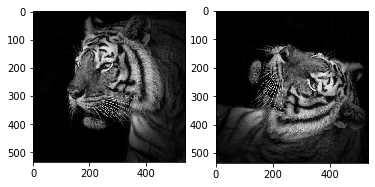

In [52]:
img7 = rot(imggray)
affichage(img7)

#### 3.3.5. Composition des transformations géométriques

Les transformations précédentes peuvent être composées...

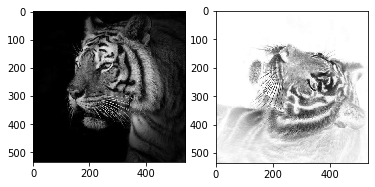

In [53]:
imgcomposee = symH(transpose(neg(imggray)))
affichage(imgcomposee)

## 4. Application d'une fonction numérique pour traiter chaque pixel de la matrice

### 4.1 Image en Noir et Blanc, avec seuil

Tous les pixels plus sombres qu'un niveau de gris donné, appelé seuil, sont changés en pixels noirs, tous les autres en pixels blancs

In [0]:
def seuil(im, s):
    imNB = np.zeros([hauteur,largeur])
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = im[i,j]
            if pixel < s :
                pix = 0
            else :
                pix = 255
            imNB[i,j] = pix
    return imNB


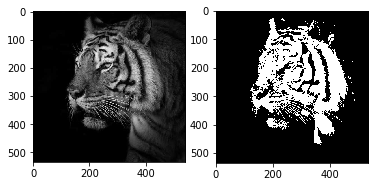

In [55]:
img8 = seuil(imggray, 64)
affichage(img8)

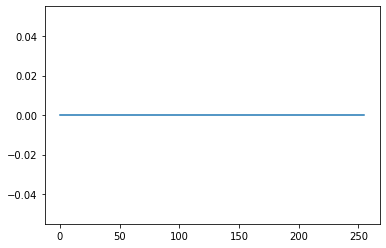

In [56]:
histogramme(img8)

### 4.2. Diminution du nombre de niveaux de gris

In [0]:
def niveau(im,nbniv) :
    amplitude = int(255/nbniv)
    imniv = amplitude * np.floor(1/amplitude *im)
    return imniv

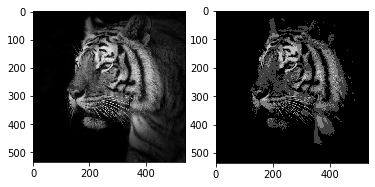

In [58]:
N = 4
img9 = niveau(imggray,N)
affichage(img9)

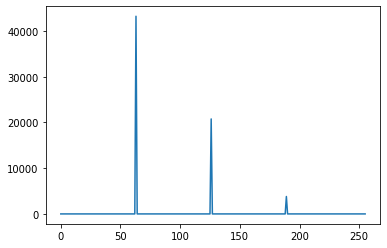

In [59]:
histogramme(img9)

### 4.3. Fonction de contraste / atténuation
#### 4.3.1. Contraste

In [0]:
def contraste(im, C) :
    # détermination des coefficients de la fonction de contraste en fonction du taux de contraste
    A = np.array([[127**2 , 127 , 1 ],[ 255**2 , 255 , 1], [ 63**2 , 63 , 1]])
    invA = np.linalg.inv(A)
    B = np.array([[1],[1],[1-C]])
    X = np.dot(invA , B)
    a = X[0]
    b = X[1]
    c = X[2]
    
    # définition de la fontion de contraste
    def f(x) :
        y = np.floor(a*x**3 + b*x**2 + c*x)
        return y
    
    # tracé de la fonction de constraste
    xx = np.arange(256)
    yy = a*xx**3+b*xx**2+c*xx
    plt.plot(xx,yy)
    plt.plot(xx,xx)
    plt.show()
    cont = f(im)
    return cont

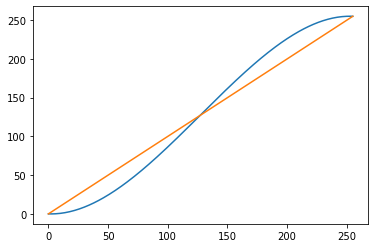

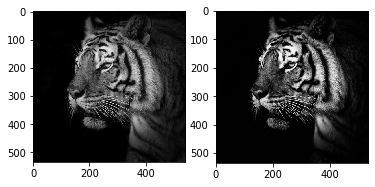

In [61]:
# contraste
img10 = contraste(imggray,(0.4))
affichage(img10)

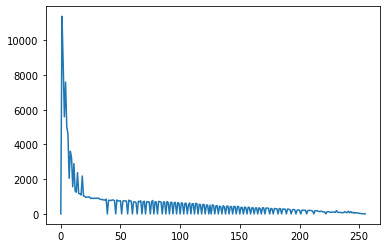

In [62]:
histogramme(img10)

#### 4.3.2. Atténuation

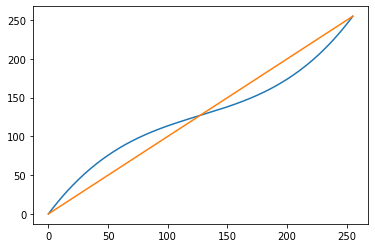

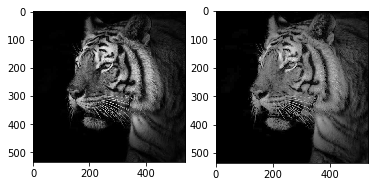

In [63]:
#atténuation : même fonction avec C négatif
img11 = contraste(imggray,(-0.4))
#plt.imshow(imgcont,cmap='gray')
affichage(img11)

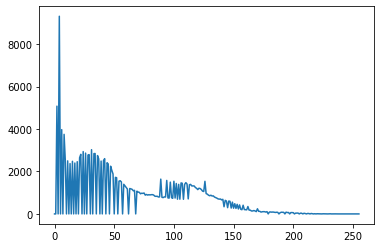

In [64]:
histogramme(img11)

### 4.3. Bruit

Chaque pixel est éclairci de manière aléatoire

In [0]:
def bruit(im, intensite) :
    matbruit = intensite * 20 *np.random.rand(hauteur,largeur)
    imB = im + matbruit
    return imB 

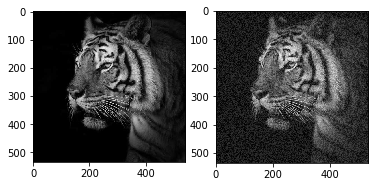

In [66]:
I = 3    # I : intensite du bruit, entre 1 et 4
img12 = bruit(imggray,I)
affichage(img12)


### 4.4. Différence

->> Affiche l'image obtenue par différence de deux images

In [0]:
def difference(im1,im2) :
    imD = im1 - im2 # oups... j'ai écrit la version vectorielle... ;)
    return imD

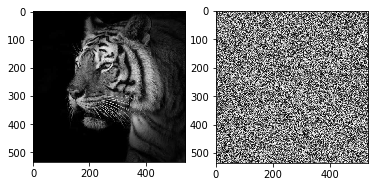

In [68]:
# matrice du bruit
img13 = difference(img12,imggray)
affichage(img13)

### 4.5. Détection des contours

In [0]:
def contours(im):
    imC = np.zeros([hauteur,largeur])    
    for i in range(1 , hauteur-1) :
        for j in range(1 , largeur-1) :
            pixelH = im[i-1,j]
            pixelB = im[i+1,j]
            pixelG = im[i,j-1]
            pixelD = im[i,j+1]
            pix = 255 - 200*int(sqrt( (pixelH - pixelB)**2 + (pixelD - pixelG)**2))    
            imC[i,j] = pix
    return imC

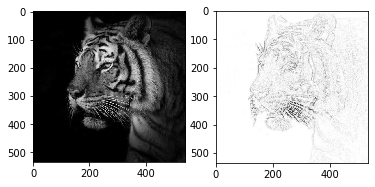

In [70]:
img14 = contours(img11)
affichage(img14)

### 4.6 Flou médian

On remplace dans la matrice, chaque pixel par la médiane des pixels qui l'entourent, sur un "rayon" donné.
On pourra aussi tester le flou "moyen" ("mean") et observer la différence avec le flou médian


In [0]:
def floumedian(im,l):
    imFM = np.zeros([hauteur,largeur])
    
    for i in range(l , hauteur-l) :
        for j in range(l , largeur-l) :
            autour = im[i-l:i+l,j-l:j+l]
            pix = np.median(autour)    
            imFM[i,j] = pix
    return imFM

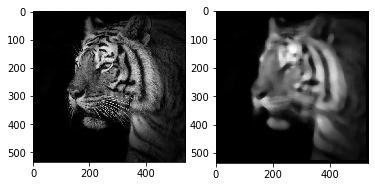

In [72]:
img15 = floumedian(img,10)
affichage(img15)

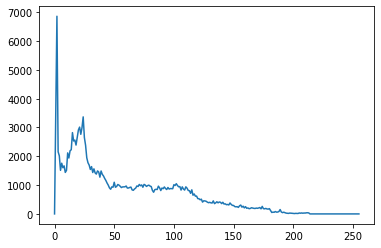

In [73]:
histogramme(img15)

## 5. Opérations matricielles

### 5.1. Le filtrage : la "convolution"

On cherche à appliquer un "filtre" à la matrice : elle est parcourue en sous-matrices, souvent de taille 3x3 ou 5x5, traitées par produit avec une matrice de même taille appelée "matrice de convolution" ou "noyau". (C'est par exemple la méthode appliquée pour appliquer un flou "gaussien" : la matrice de convolution est une matrice de valeurs calculées au moyen d'une loi normale centrée réduite.)

*On pourra lire la page : https://docs.gimp.org/2.6/fr/plug-in-convmatrix.html pour comprendre la notion de filtrage et tester en ligne ses propres filtres*

In [0]:
def filtre(im,C) :
    imF = np.copy(im)
    norme = 1
    if np.sum(C) > 1.E-5 :
        norme = np.sum(C)*3
    for i in range(1,hauteur-1) :
        for j in range(1,largeur-1) :
            imF[i,j] = int(np.sum(C @ im[i-1:i+2,j-1:j+2]) /norme) # @ désigne le produit matriciel 
            if imF[i,j] > 255 :
                imF[i,j] = 255
            if imF[i,j] < 0 :
                imF[i,j] = 0
    return imF


Tester les filtres ci-dessous...

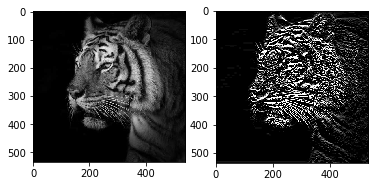

In [75]:
C1 = [[0,1,0],[0,0,0],[0,0,0]]
C2 = [[0,-1,0],[-1,5,-1],[0,-1,0]] # netteté
C3 = [[1,1,1],[1,1,1],[1,1,1]] # flou
C4 = [[1,1,1],[1,-4,1],[1,1,1]]
C5 = [[0,1,0],[1,-5,1],[0,1,0]]
C6 = [[-2,-1,0],[-1,1,1],[0,1,2]] # repoussage
C7 = [[-1,-1,2],[-1,0,2],[-1,-1,2]]
C8 = [[0,1,0],[1,4,1],[0,1,0]]
C9 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] # contours
C10 =[[1,2,1],[2,4,2],[1,2,1]] # flou gaussien
C11 =[[-1,0,1],[-2,0,2],[-1,0,1]]

img17 = filtre(imggray, C11)
affichage(img17)

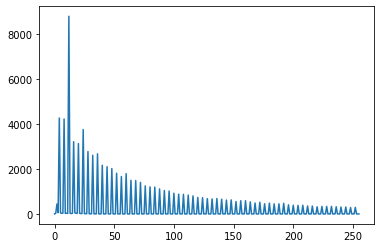

In [76]:
histogramme(img17)

### 5.2 La pixellisation

On groupe les pixels en carrés de taille donnée et on calcule, discrètement, la moyenne des pixels de l'image originale dans ce carré

In [0]:
def pixellisation(im,P) :
    imP = np.copy(im)
    
    i = 0
    while (i+1) * P < hauteur :
        j = 0
        while (j+1) * P < largeur :
            bloc = im[ i*P  : (i+1)*P , j*P : (j+1)*P]
            pixel = (np.mean(bloc))
            
            for a in range(P) :
                for b in range(P) :
                    imP[i*P+a,j*P+b] = pixel
                    
            j = j + 1            
        i = i + 1
        
    return imP


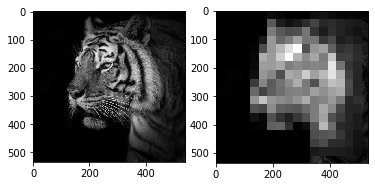

In [80]:
img18 = pixellisation(imggray, 30)
affichage(img18)

# 6. La compression !

*source prinipale : Franck Cleary : https://www.frankcleary.com/svdimage/*


En Terminale, avec des élèves disposant de l'outil matriciel, on pourra pousser plus loin le traitement d'image, avec un TP assez impressionnant : la compression d'image.
L'outil mathématique sous-jacent s'appelle la **décomposition en valeurs singulières (SVD)**.
Un outil mathématique très proche existe en statistiques : l' *analyse en composantes principales*.

La SVD est aussi utilisée à l'inverse, pour récupérer une photo filtrée (floutée par exemple), mais *motus*...si on floute, ce n'est pas pour qu'un rigolo défloute... (voir ici : http://www.tsi.enst.fr/pages/enseignement/ressources/mti/SVD/SVD.html , bluffant !)


Pour comprendre le principe... Si vous aviez droit à deux éléments de description pour décrire l'image (sans parler de ce qu'elle montre, juste la répartition des gris), que diriez-vous ?
Et si l'on vous donnait droit à 5 indices ? à 20 ? à 50 ? C'est l'idée de la compression : certains éléments d'une image sont plus flagrants que d'autres, la SVD va mesurer ce taux "d'importance", et plsu on s'autorise d'éléments descripteurs, plus le résultat sera fidèle.
En croisant les informations sur des bandes horizontales et verticales, on arrive à donner plus d'informations sans frais.


L'outil puissant de calcul de la décomposition en valeurs singulières (donc inaccessible ou presque, explication quasi compréhensible ici : https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/) se trouve dans un sous module de Numpy, du nom de "linalg". Il va, à partir d'une matrice donnée, retourner 3 autres matrices, U, Sigma, et V, qui, recombinées d'une certaine façon vont redonner la matrice initiale.


La matrice Sigma ne comportera des valeurs que sur sa diagonale, rangées en ordre décroissant, dont les dernières sont très proches de 0 et peuvent donc être négligées. On obtient ainsi une approximation de la matrice initiale, d'autant meilleure que l'on a gardé plus de valeurs, mais d'autant plus légère qu'on en a supprimé !

Voilà pourquoi les fichiers "jpg" pèsent si significativement moins lourd que les fichiers "bmp" dont ils proviennent ! (même si les algorithmes de compression des logiciels dédiés au traitement d'image sont encore plus efficaces que la SVD)


--------------------------------------
Tout d'abord, avec la méthode "numpy.matrix", transformons notre tableau en matrice, ce qui ne change strictement rien à son apparence.

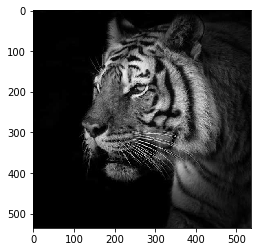

In [81]:
imgmat = np.matrix(imggray)
plt.imshow(imgmat, cmap='gray');

Faisons calculer la **SVD** par la méthode *numpy.linalg.svd* (le coeur du TP tient en une ligne... c'est pour éviter cet effet "boîte noire" qu'on n'utilise pas Numpy, en théorie, en 1ère...

In [0]:
U, sigma, V = np.linalg.svd(imgmat)

In [83]:
print('Valeurs singulières :')
for k in sigma :
    print(str((int(k)*10)/10) + "   ", end = '')
print()

Valeurs singulières :
28976.0   7300.0   5893.0   4966.0   4492.0   4061.0   3673.0   3360.0   3231.0   2818.0   2583.0   2406.0   2158.0   2112.0   2005.0   1961.0   1775.0   1666.0   1611.0   1558.0   1502.0   1474.0   1394.0   1293.0   1267.0   1212.0   1192.0   1173.0   1127.0   1076.0   1052.0   1030.0   1020.0   986.0   982.0   942.0   921.0   883.0   869.0   833.0   821.0   805.0   790.0   779.0   756.0   738.0   728.0   717.0   709.0   705.0   695.0   676.0   666.0   653.0   643.0   634.0   625.0   611.0   599.0   591.0   575.0   571.0   569.0   554.0   553.0   536.0   531.0   523.0   519.0   513.0   508.0   505.0   494.0   490.0   487.0   479.0   475.0   472.0   462.0   458.0   451.0   445.0   436.0   433.0   426.0   422.0   419.0   417.0   409.0   401.0   399.0   395.0   391.0   390.0   383.0   379.0   378.0   373.0   369.0   364.0   361.0   355.0   350.0   347.0   345.0   344.0   336.0   334.0   330.0   326.0   322.0   318.0   317.0   311.0   310.0   307.0   304.0   303.0   

Reconstruisons l'image, en ne conservant qu'un certain nombre de ces valeurs (nombre de colonnes de U ou de lignes de V) :

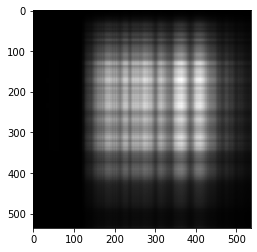

In [84]:
reconstructimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstructimg, cmap='gray');

Ici, la reconstruction n'a utilisé que la 1ère colonne de U, la 1ère valeur de Sigma, la 1ère ligne de V, soit *hauteur + largeur + 1* valeurs, alors que la matrice en comportait *hauteur x largeur*.

Voilà ce que ça donne si on prend 3 colonnes : 

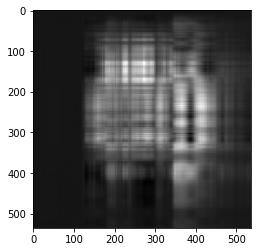

In [85]:
reconstructimg = np.matrix(U[:, :3]) * np.diag(sigma[:3]) * np.matrix(V[:3, :])
plt.imshow(reconstructimg, cmap='gray');

et avec 20 : 

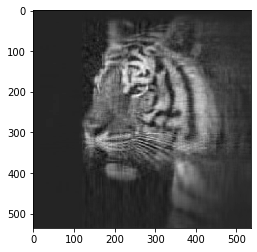

In [86]:
reconstructimg = np.matrix(U[:, :20]) * np.diag(sigma[:20]) * np.matrix(V[:20, :])
plt.imshow(reconstructimg, cmap='gray');

Là, l'image occupe seulement (20 x 610 + 20 + 20 x 610) / (610 x 610) soit environ 6,5% de la taille initiale !!! 

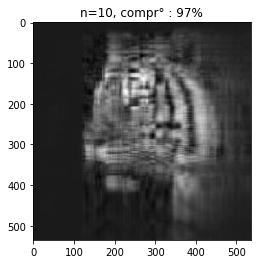

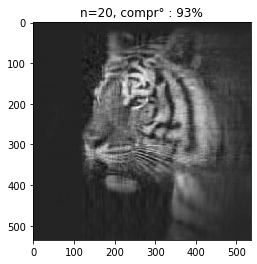

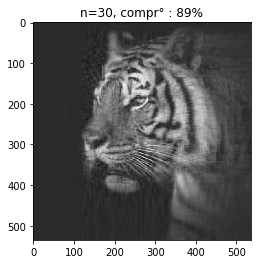

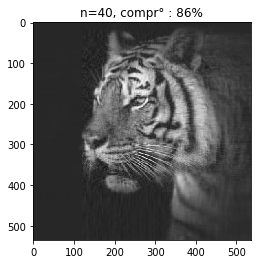

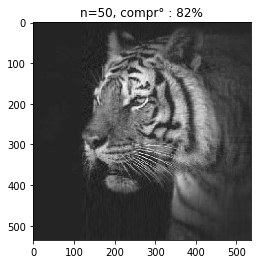

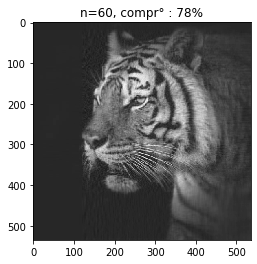

In [87]:
#l = 1
for i in range(10, 61, 10):
    reconstructimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    #plt.subplot(3, 3, l + (l>3)*3)
    plt.imshow(reconstructimg, cmap='gray')
    title = "n=" + str(i) + ", compr° : " + str(100 - int((i*hauteur + i + i * largeur)/(hauteur*largeur)*100)) +"%"
    plt.title(title)
    plt.show()
    #l = l + 1


## 7. La stéganographie

La stéganographie consiste à cacher un message dans une image.
TP non corrigé en construction autonome...
À vous de jouer si le coeur vous en dit...